# The purpose
   *  Model: $f_{w, b}(x) = wx + b$
   *  Parameters: $w, b$
   *  Cost Function $J(w, b)=\frac{1}{2m} \sum_{i=1}^{m}(f_{w, b}(x^{(i)}) - y^{(i)})^2$
      * Which is basically the Mean Squared Error of the difference between the predicted value and the actual value
   *  Objective: $minimize_{w, b} J(w, b)$



In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
salary_data = pd.read_csv('../data/salary_dataset.csv')
salary_df = pd.DataFrame(salary_data)

In [4]:
salary_df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
salary_df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
class Algorithms:
    # Cost Function - there could be others where bias isn't 0, but for this example, we're assuming it's 0
    # basically the Mean Squared Error of the difference between the predicted value and the actual values given the weights and bias
    @staticmethod
    # X: Feature matrix (m x n), where m is the number of samples and n is the number of features.
    # y: Target variable vector (m x 1).
    # theta: Parameter vector (n x 1).
    def compute_cost(X, y, theta):
        m = len(y)
        predictions = X.dot(theta)
        squared_errors = np.square(predictions - y)
        cost = 1 / (2 * m) * np.sum(squared_errors)
        
        return cost
    
    @staticmethod
    def gradient_descent(X, y, theta, alpha, iterations):
        m = len(y)
        cost_history = []
        
        for _ in range(iterations):
            predictions = X.dot(theta)
            error = predictions - y
            gradient = X.T.dot(error) / m
            
            theta -= alpha * gradient
            cost = Algorithms.compute_cost(X, y, theta)
            cost_history.append(cost)
        
        return theta, cost_history
    
    @staticmethod
    def feature_normalize(X):
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
        X_norm = (X - mu) / sigma
        
        return X_norm, mu, sigma
    
    @staticmethod
    def normalize(X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

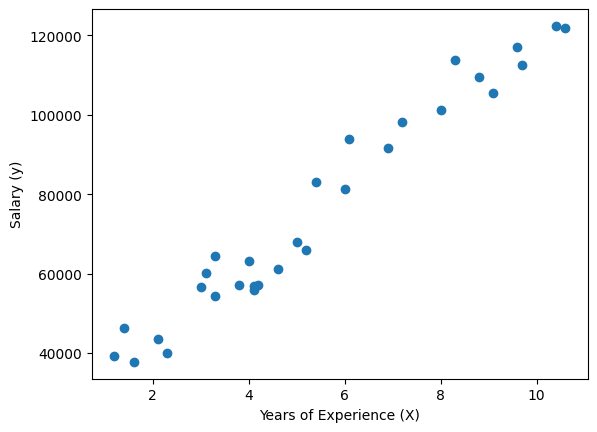

In [7]:
# 1A: Plotting the data
plt.xlabel('Years of Experience (X)', rotation=0)
plt.ylabel('Salary (y)', rotation=90)
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])

In [8]:
# 1B: Cost Function
X = salary_df['YearsExperience'].values
y = salary_df['Salary'].values
theta = np.random.randn(30, 30)

cost = Algorithms.compute_cost(X, y, theta)

In [9]:
cost

3250980831.774719

array([ 2333.32962776, 12642.41817659])

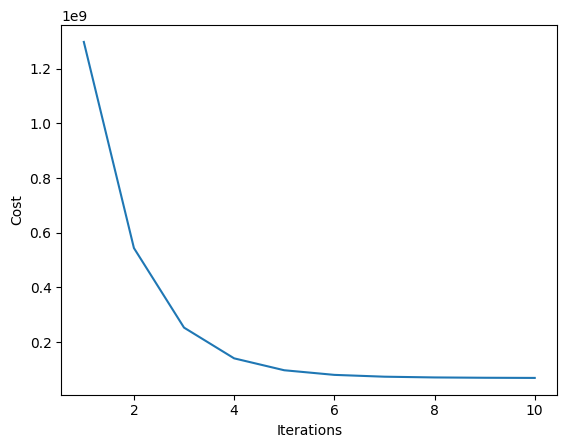

In [13]:
# 1C: Gradient Descent
X = salary_df['YearsExperience'].values
y = salary_df['Salary'].values
m = len(y)
X_b = np.vstack((np.ones(m), X)).T
theta = np.random.randn(2)
alpha = 0.01
# take less epochs to see the cost function converge
iterations = 10

theta, cost_history = Algorithms.gradient_descent(X_b, y, theta, alpha, iterations)

plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

theta

In [11]:
# 1D: Feature Normalization
X = np.c_[np.ones(salary_df.shape[0]), salary_df['YearsExperience']]

# 2. Create y (target variable)
y = salary_df['Salary'].values.reshape(-1, 1)

# 3. Normalize X
X_norm, mu, sigma = Algorithms.feature_normalize(X[:, 1].reshape(-1, 1))
X_norm = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# 4. Compute optimal parameters using the normal equation
theta_normal_eqn = Algorithms.normalize(X, y)

# 5. Make predictions
predictions_normal_eqn = X.dot(theta_normal_eqn)

# 6. Print the final parameters, mu, and sigma
print(f"Parameters from Normal Equation:\n{theta_normal_eqn}\n")
print(f"Mu: {mu}\n")
print(f"Sigma: {sigma}\n")

Parameters from Normal Equation:
[[24848.20396652]
 [ 9449.96232146]]

Mu: [5.41333333]

Sigma: [2.79018916]

